In [1]:
# imports
from __future__ import print_function
import keras
#from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import statistics
from keras.regularizers import l2

from tensorflow.keras.optimizers import SGD

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)


In [4]:
# Creating parameters for the model
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss = tf.keras.losses.categorical_crossentropy,
        optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 29s 4ms/step - loss: 0.8333 - accuracy: 0.7509 - val_loss: 0.2677 - val_accuracy: 0.9200
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2581 - accuracy: 0.9241 - val_loss: 0.1948 - val_accuracy: 0.9424
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1898 - accuracy: 0.9445 - val_loss: 0.1676 - val_accuracy: 0.9505
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1516 - accuracy: 0.9553 - val_loss: 0.1376 - val_accuracy: 0.9582
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1304 - accuracy: 0.9616 - val_loss: 0.1243 - val_accuracy: 0.9619
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.1257 - val_accuracy: 0.9624
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1020 - accuracy: 0.9695 - val_loss: 0.1103 - val_accuracy: 0.9666
Epoch

In [5]:
print(fit_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [6]:
v = fit_info.history['val_accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

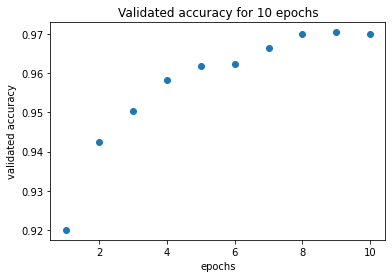

In [7]:
plt.scatter(n, v)
plt.title('Validated accuracy for 10 epochs') #title
plt.xlabel('epochs') #x label
plt.ylabel('validated accuracy') #y label
plt.show()

In [8]:
a = fit_info.history['accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

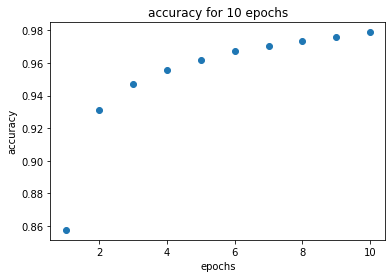

In [9]:
plt.scatter(n, a)
plt.title('accuracy for 10 epochs') #title
plt.xlabel('epochs') #x label
plt.ylabel('accuracy') #y label
plt.show()

In [10]:
#fit_info.history
print(fit_info.history['val_accuracy'])

[0.9200000166893005, 0.9423999786376953, 0.9505000114440918, 0.9581999778747559, 0.961899995803833, 0.9624000191688538, 0.9666000008583069, 0.9700000286102295, 0.9704999923706055, 0.9700999855995178]


In [11]:
cc = []
cc = fit_info.history['val_accuracy']
#print(statistics.mean(cc))
print(max(cc))

0.9704999923706055


In [12]:
epochs = 40

In [13]:
model = Sequential()

model.add(Flatten())
model.add(Dense(300, activation = 'relu')) 
model.add(Dense(500, activation = 'relu')) 
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 6s 9ms/step - loss: 0.7408 - accuracy: 0.8032 - val_loss: 0.2426 - val_accuracy: 0.9273
Epoch 2/40
469/469 [==============================] - 4s 9ms/step - loss: 0.2128 - accuracy: 0.9384 - val_loss: 0.1613 - val_accuracy: 0.9532
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1545 - accuracy: 0.9559 - val_loss: 0.1259 - val_accuracy: 0.9620
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1217 - accuracy: 0.9662 - val_loss: 0.1127 - val_accuracy: 0.9667
Epoch 5/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0992 - accuracy: 0.9708 - val_loss: 0.1066 - val_accuracy: 0.9674
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0689 - accuracy: 0.9798 - val_loss: 0.0862 - val_accuracy: 0.9730
Epo

In [19]:
model_weights = [0.001, 0.0002, 0.0003, 0.00005, 0.000008]

In [ ]:
result = []
dump = []    
for w in range(len(model_weights)):
        a_score = []
        b_score = []
        count = 1
        while count < 4 :
            model = Sequential()
            model.add(Flatten())
            model.add(Dense(300, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(500, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(num_classes, activation='softmax'))
            
            model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), 
                          metrics=['accuracy'])
            
            fit_info = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            a_score.append(score[1])
            b_score.append(score[0])
            count += 1
        result.append(a_score)
        dump.append(b_score)    
    #return res

Epoch 1/40
469/469 [==============================] - 6s 9ms/step - loss: 0.7401 - accuracy: 0.7996 - val_loss: 0.2451 - val_accuracy: 0.9260
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2219 - accuracy: 0.9373 - val_loss: 0.1729 - val_accuracy: 0.9466
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1588 - accuracy: 0.9532 - val_loss: 0.1414 - val_accuracy: 0.9584
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1186 - accuracy: 0.9642 - val_loss: 0.1144 - val_accuracy: 0.9641
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0972 - accuracy: 0.9721 - val_loss: 0.0926 - val_accuracy: 0.9707
Epoch 6/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0841 - val_accuracy: 0.9731
Epoch 7/40
469/469 [==============================] - 4s 10ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.0841 - val_accuracy: 0.9725
Epoc

In [ ]:
print(result)
print()
print(dump)

Ta bort under
---

Below works


In [16]:
## Model with weights ##

values = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7] # the weights used 

output=[] # store output 

# total rounds will be 15 in the end 
for value in values: # for all weight values
    y=1
    accuracy_score=[]
    while y<4: # loop every weight three times
        model = Sequential()

        model.add(Flatten())
        model.add(Dense(300, activation = 'relu',kernel_regularizer=l2(value)))
        model.add(Dense(500, activation = 'relu',kernel_regularizer=l2(value)))
        model.add(Dense(num_classes, activation='softmax'))


        model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.gradient_descent_v2.SGD(lr = 0.1),
            metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        accuracy_score.append(score[1])
        y+=1
    output.append(accuracy_score) # store output for the accuracy score 
    
    

c:\python\3.9.0\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:357: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/40
469/469 [==============================] - 6s 8ms/step - loss: 1.5012 - accuracy: 0.8061 - val_loss: 0.9367 - val_accuracy: 0.9328
Epoch 2/40
469/469 [==============================] - 4s 8ms/step - loss: 0.8960 - accuracy: 0.9357 - val_loss: 0.7602 - val_accuracy: 0.9524
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.7374 - accuracy: 0.9530 - val_loss: 0.6515 - val_accuracy: 0.9589
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.6208 - accuracy: 0.9630 - val_loss: 0.5642 - val_accuracy: 0.9614
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.5324 - accuracy: 0.9680 - val_loss: 0.4830 - val_accuracy: 0.9660
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.4597 - accuracy: 0.9722 - val_loss: 0.4264 - val_accuracy: 0.9710
Epoch 7/40
469/469 [==============================] - 4s 9ms/step - loss: 0.4026 - accuracy: 0.9741 - val_loss: 0.3707 - val_accuracy: 0.9735
Epoch 

469/469 [==============================] - 4s 9ms/step - loss: 0.0936 - accuracy: 0.9923 - val_loss: 0.1201 - val_accuracy: 0.9813
Epoch 36/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0929 - accuracy: 0.9929 - val_loss: 0.1423 - val_accuracy: 0.9738
Epoch 37/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0934 - accuracy: 0.9924 - val_loss: 0.1212 - val_accuracy: 0.9818
Epoch 38/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0917 - accuracy: 0.9938 - val_loss: 0.1205 - val_accuracy: 0.9819
Epoch 39/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0911 - accuracy: 0.9934 - val_loss: 0.1210 - val_accuracy: 0.9809
Epoch 40/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - accuracy: 0.9932 - val_loss: 0.1211 - val_accuracy: 0.9808
Epoch 1/40
469/469 [==============================] - 5s 7ms/step - loss: 0.8233 - accuracy: 0.8024 - val_loss: 0.3283 - val_accuracy: 0.9277
Epoch 2/40


469/469 [==============================] - 3s 6ms/step - loss: 0.0708 - accuracy: 0.9994 - val_loss: 0.1256 - val_accuracy: 0.9820
Epoch 30/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0699 - accuracy: 0.9995 - val_loss: 0.1268 - val_accuracy: 0.9822
Epoch 31/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0686 - accuracy: 0.9996 - val_loss: 0.1228 - val_accuracy: 0.9821
Epoch 32/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0675 - accuracy: 0.9996 - val_loss: 0.1228 - val_accuracy: 0.9819
Epoch 33/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0663 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9820
Epoch 34/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0650 - accuracy: 0.9999 - val_loss: 0.1272 - val_accuracy: 0.9794
Epoch 35/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0644 - accuracy: 0.9998 - val_loss: 0.1189 - val_accuracy: 0.9828
Epoch 36/40

469/469 [==============================] - 3s 7ms/step - loss: 0.0189 - accuracy: 0.9990 - val_loss: 0.0750 - val_accuracy: 0.9806
Epoch 24/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0179 - accuracy: 0.9991 - val_loss: 0.0744 - val_accuracy: 0.9814
Epoch 25/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0178 - accuracy: 0.9990 - val_loss: 0.0746 - val_accuracy: 0.9815
Epoch 26/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9993 - val_loss: 0.0772 - val_accuracy: 0.9813
Epoch 27/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0167 - accuracy: 0.9993 - val_loss: 0.0751 - val_accuracy: 0.9810
Epoch 28/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0154 - accuracy: 0.9997 - val_loss: 0.0764 - val_accuracy: 0.9813
Epoch 29/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9998 - val_loss: 0.0767 - val_accuracy: 0.9820
Epoch 30/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0190 - accuracy: 0.9960 - val_loss: 0.0639 - val_accuracy: 0.9798
Epoch 18/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0187 - accuracy: 0.9961 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 19/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0145 - accuracy: 0.9977 - val_loss: 0.0633 - val_accuracy: 0.9795
Epoch 20/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0138 - accuracy: 0.9979 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 21/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 0.0631 - val_accuracy: 0.9812
Epoch 22/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0110 - accuracy: 0.9987 - val_loss: 0.0635 - val_accuracy: 0.9799
Epoch 23/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0097 - accuracy: 0.9988 - val_loss: 0.0630 - val_accuracy: 0.9802
Epoch 24/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.0765 - val_accuracy: 0.9757
Epoch 12/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0342 - accuracy: 0.9914 - val_loss: 0.0652 - val_accuracy: 0.9794
Epoch 13/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0293 - accuracy: 0.9926 - val_loss: 0.0670 - val_accuracy: 0.9778
Epoch 14/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0258 - accuracy: 0.9937 - val_loss: 0.0665 - val_accuracy: 0.9782
Epoch 15/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0247 - accuracy: 0.9940 - val_loss: 0.0664 - val_accuracy: 0.9796
Epoch 16/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.9956 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 17/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0184 - accuracy: 0.9963 - val_loss: 0.0654 - val_accuracy: 0.9790
Epoch 18/40

In [17]:
output

[[0.9782999753952026, 0.9793999791145325, 0.9807999730110168],
 [0.9818000197410583, 0.982200026512146, 0.9829000234603882],
 [0.9801999926567078, 0.9811000227928162, 0.9818000197410583],
 [0.9819999933242798, 0.9824000000953674, 0.9819999933242798],
 [0.9807000160217285, 0.980400025844574, 0.9815000295639038]]

In [18]:
def std_mean(lst):
    val_mean = []
    val_std = []
    
    for i in lst:
        val_mean.append(np.mean(i))
        val_std.append(np.std(i)) 
    return val_mean, val_std

In [24]:
standard_dev = []
mean_val = []

mean_val, standard_dev = std_mean(output)
print(standard_dev)
print()
print(mean_val)

[0.001023066152515711, 0.00045460719637993325, 0.0006549076817135811, 0.0001885650002377399, 0.000464282475869132]

[0.9794999758402506, 0.9823000232378641, 0.9810333450635275, 0.9821333289146423, 0.9808666904767355]


In [25]:
def get_bounds(lst, lst2):
    lst_u = []
    lst_l = []
    cc = 0
    
    for i in lst:
        t1 = i + lst2[cc]
        t2 = i - lst2[cc]
        lst_u.append(t1)
        lst_l.append(t2)
        cc += 1
    return lst_u, lst_l

In [28]:
standard_dev = []
mean_val = []

mean_val, standard_dev = std_mean(output)
print(standard_dev)
print()
print(mean_val)

[0.001023066152515711, 0.00045460719637993325, 0.0006549076817135811, 0.0001885650002377399, 0.000464282475869132]

[0.9794999758402506, 0.9823000232378641, 0.9810333450635275, 0.9821333289146423, 0.9808666904767355]


In [30]:
ul, ll = get_bounds(mean_val,standard_dev)
print(ul)
print()
print(ll)

[0.9805230419927663, 0.982754630434244, 0.9816882527452411, 0.9823218939148801, 0.9813309729526046]

[0.9784769096877349, 0.9818454160414842, 0.9803784373818138, 0.9819447639144046, 0.9804024080008663]


In [31]:
x=['1e-3','1e-4','1e-5','1e-6','1e-7']

<function matplotlib.pyplot.show(close=None, block=None)>

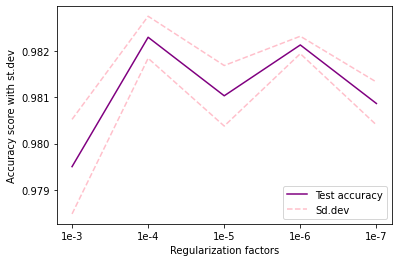

In [32]:
plt.plot(x,mean_val, color='purple')
plt.plot(x,ul,color='pink',linestyle='dashed')
plt.plot(x,ll,color='pink',linestyle='dashed')
plt.ylabel('Accuracy score with st.dev')
plt.xlabel('Regularization factors')
plt.legend(['Test accuracy', 'Sd.dev'], loc='lower right')
plt.savefig('accuracy')
plt.show